# EDA

In [2]:
%matplotlib inline

In [3]:
from globals import DATADIR, DATAMALDIR, LOCAL_BUCKET, BENIGN_LIST, MALICIOUS_LIST, BENIGN, MALICIOUS
from storage import FsStorage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def files_df():
    flist = []
    verdicts = []
    
    with open(BENIGN_LIST) as f:
        lines = f.read().split()
    flist.extend(lines)
    verdicts.extend([BENIGN]*len(lines))
    
    with open(MALICIOUS_LIST) as f:
        lines = f.read().split()
    flist.extend(lines)
    verdicts.extend([MALICIOUS]*len(lines))
    return pd.DataFrame({'hash': flist, 'verdict': verdicts})

In [5]:
df = files_df().sample(frac=1, random_state=42)
cut_index = int(0.9*df.shape[0])
df_train, df_test = df.iloc[:cut_index], df.iloc[cut_index:]

In [6]:
set(df_train.index).intersection(set(df_test.index))

set()

### Dummy clf

In [7]:
class DummyClassifier:
    def __init__(self):
        self.classes_proba = None
    def fit(self, y):
        """
        y: pd series
        """
        self.classes_proba = y.value_counts() / y.shape[0]
    def predict(self, x):
        return np.random.choice(self.classes_proba.index, size=x.shape[0], p=self.classes_proba.values)

In [8]:
clf = DummyClassifier()

In [9]:
clf.fit(df_train['verdict'])

In [10]:
preds = clf.predict(df_test)

In [11]:
np.sum(preds == df_test['verdict']) / df_test['verdict'].shape[0]

0.747985938186612

### Size of mals

In [12]:
import os
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [13]:
mals = df[df['verdict'] == 1]

In [14]:
sizes = [os.path.getsize(LOCAL_BUCKET + DATAMALDIR + name) for name in mals['hash']]
mals['sizes'] = sizes

/specific/scratches/scratch/miniconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


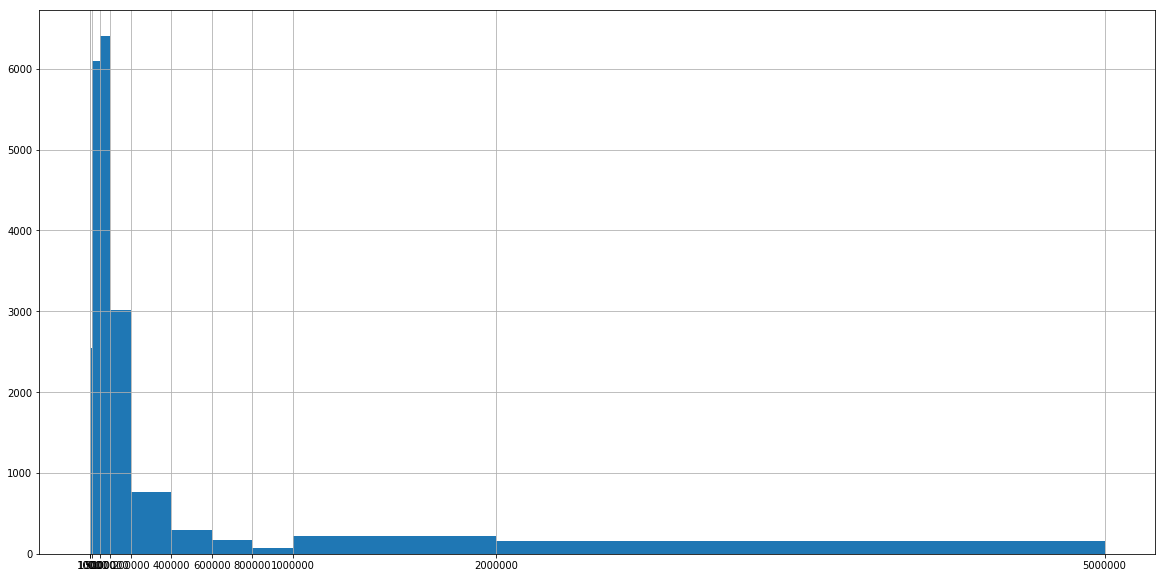

In [15]:
bins = np.array([0, 1000, 10000, 50000, 100000, 200000, 400000, 600000, 800000, 1000000, 2000000, 5000000])
mals['sizes'].hist(bins=bins, histtype='stepfilled')
plt.xticks(bins)
plt.show()